# Combined Numeric and Object Data

Now that I have explored what works well together amongst the numeric dataset and created the dummies for the features I am going to focus on, I am bringing everything together in this notebook to create the best model possible.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df_train_v6 = pd.read_csv('../datasets/cleaned_data/clean_train_v6.csv', na_filter=False)
df_train_v6.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Garage Finish_RFn,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,1,NA,1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,1,NA,1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,1,NA,0,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,1,NA,0,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,1,NA,1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,1


In [3]:
num_feats = pd.read_csv('../datasets/cleaned_data/feat_num_final.csv', na_filter=False)
num_feats.head()

,Id,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Gr Liv Area,Half Bath,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,...,Paved Drive,Pool QC,overall_qual_cond,exter_qual_cond,bsmt_qual_cond,mas_vnr_ext_qual_cond,bsmt_sf_qual_cond,garage_area_qual_cond,bsmt_exposure_qual,tot_fire_qu
0,109,6,8,725,754,1479,1,1,6,0,...,1.0,0,48,12,9,3468.0,6525.0,4275.0,3,0
1,544,7,5,913,1209,2122,1,1,8,1,...,1.0,0,35,12,12,1584.0,10956.0,5031.0,4,3
2,153,5,7,1057,0,1057,0,1,5,0,...,1.0,0,35,12,9,0.0,9513.0,2214.0,3,0
3,318,5,5,744,700,1444,1,1,7,0,...,1.0,0,25,9,12,0.0,4608.0,3600.0,4,0
4,255,6,8,831,614,1445,0,1,6,0,...,0.0,0,48,9,8,0.0,5408.0,4356.0,2,0


In [4]:
dummy_feats = pd.read_csv('../datasets/cleaned_data/dummy_cols.csv', na_filter=False)
dummy_feats.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Id
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,109
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,544
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,153
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,318
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,255


In [5]:
final_feats = pd.merge(num_feats, dummy_feats, on='Id', how='left')
final_feats.shape

(2049, 136)

In [6]:
final_feats.isnull().sum().sum()

0

In [7]:
final_feats.drop(columns='Id', inplace=True)

In [8]:
final_feats.head()

,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Gr Liv Area,Half Bath,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Misc Val,...,Garage Finish_RFn,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,6,8,725,754,1479,1,1,6,0,0,...,1,0,0,0,0,0,0,0,0,1
1,7,5,913,1209,2122,1,1,8,1,0,...,1,0,0,0,0,0,0,0,0,1
2,5,7,1057,0,1057,0,1,5,0,0,...,0,1,0,0,0,0,0,0,0,1
3,5,5,744,700,1444,1,1,7,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,8,831,614,1445,0,1,6,0,0,...,0,1,0,0,0,0,0,0,0,1


#### Model 6
Now that everything is in the notebook, I am first going to run some trials and see how the model does as is without any further engineering. 

In [9]:
X = df_train_v6[final_feats.columns]
y = df_train_v6['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2010)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
linreg.score(X_train, y_train)

0.9351535499175746

In [11]:
linreg.score(X_test, y_test)

0.8985892048814729

In [12]:
cross_val_score(linreg, X_train, y_train).mean()

0.9129612997808796

Variance is a little high again, which makes sense because there are a ton of columns now that are overfitting the model. I am going to submit this as is though and see what the score on Kaggle is. 

In [13]:
df_train_v6[final_feats.columns].to_csv('../datasets/ready_for_model/final_feat_v1.csv', index=False)

In [14]:
preds = linreg.predict(X_test)
residuals = y_test - preds

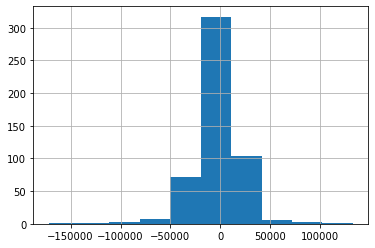

In [15]:
residuals.hist();

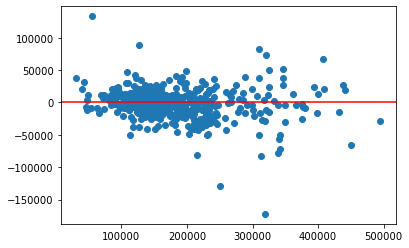

In [16]:
plt.scatter(preds, residuals)
plt.axhline(0, color='r');

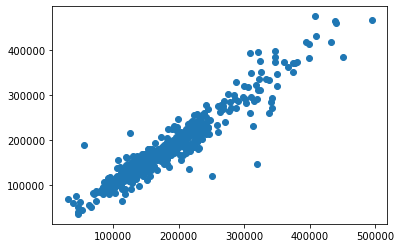

In [17]:
plt.scatter(preds, y_test);

Everything is actually looking much better in terms of spread. What I need to focus on are the outliers where the residuals are greater than 50,000 and less than -100,000

In [18]:
pd.DataFrame(residuals).sort_values('SalePrice')
# Index 348 and 412 are the worst offenders on the negative side
# Index 474, 1457, and 1757 are the ones I want to look at on the positive side.

,SalePrice
348,-172206.134898
412,-129794.750310
1611,-83084.684479
9,-80880.963194
761,-78637.540603
...,...
1157,66937.412328
1770,73834.736907
1757,83301.393937
1457,89450.225799


In [19]:
with pd.option_context('display.max_columns', 200):
    display(df_train_v6.loc[[348,412,474,1457,1757],:])
# They have the same Exterior 1 and Exterior 2 features in row, so that may be a case of double dipping. 
# Deleting the Exterior 2 from features
# They also have larger basements, so getting rid of bsmt_qual_cond from features to lessen the uptick

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,Year Built Year Remod/Add,bed_full_bath,overall_qual_cond,exter_qual_cond,bsmt_qual_cond,mas_vnr_ext_qual_cond,bsmt_sf_qual_cond,garage_area_qual_cond,bsmt_exposure_qual,tot_fire_qu,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
348,1783,528431110,20,75.0,9986,1,NA,0,Lvl,AllPub,Inside,1,Norm,Norm,1Story,8,5,2006,2007,CompShg,428.0,4,3,5,3,3,1,0.0,1,0.0,1795.0,1795.0,GasA,5,1,SBrkr,1795,0,0,1795,0.0,0.0,2,0,2,1,4,7,7,1,4,2007.0,3.0,895.0,3,3,1.0,0,49,0,0,0,0,0,NA,NA,0,2,2007,147000,4026042,4,40,12,15,5136.0,26925.0,8055.0,15,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
412,1549,910203020,30,71.0,6900,1,NA,0,Lvl,AllPub,Inside,1,Norm,Norm,1Story,5,6,1940,1955,CompShg,0.0,3,3,3,3,1,5,403.0,3,125.0,212.0,740.0,GasA,5,1,SBrkr,778,0,0,778,0.0,0.0,1,0,2,1,3,4,7,1,4,1966.0,1.0,924.0,5,5,1.0,0,25,0,0,0,0,0,NA,NA,0,2,2008,120500,3792700,2,30,9,9,0.0,6660.0,23100.0,3,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
474,2216,909276210,50,110.0,7810,1,NA,1,HLS,AllPub,Inside,1,Norm,Norm,1.5Fin,4,6,1930,2003,CompShg,0.0,3,4,3,4,1,6,189.0,1,0.0,741.0,930.0,GasA,5,1,SBrkr,1230,525,0,1755,0.0,0.0,2,0,4,1

In [20]:
final_feats_v2 = final_feats.drop(columns=['bsmt_qual_cond', 'Exterior 2nd_AsbShng', 'Exterior 2nd_AsphShn',
                                          'Exterior 2nd_Brk Cmn','Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock',
                                          'Exterior 2nd_CmentBd', 'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc',
                                          'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stone',
                                          'Exterior 2nd_Stucco', 'Exterior 2nd_VinylSd', 'Exterior 2nd_Wd Sdng',
                                          'Exterior 2nd_Wd Shng'])

In [21]:
X = df_train_v6[final_feats_v2.columns]
y = df_train_v6['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2010)

linreg.fit(X_train, y_train)

LinearRegression()

In [22]:
linreg.score(X_train, y_train)

0.9305513354392593

In [23]:
linreg.score(X_test, y_test)

0.900281217158947

In [24]:
cross_val_score(linreg, X_train, y_train).mean()

0.9098299102823931

Cross val and training score dropped, but the test score went up a bit. The variance also shrank, so this may be the best model yet. I am going to submit to Kaggle and see what happens. 

In [25]:
df_train_v6[final_feats_v2.columns].to_csv('../datasets/ready_for_model/final_feat_v2.csv', index=False)

In [26]:
preds_v2 = linreg.predict(X_test)
residuals_v2 = y_test - preds_v2

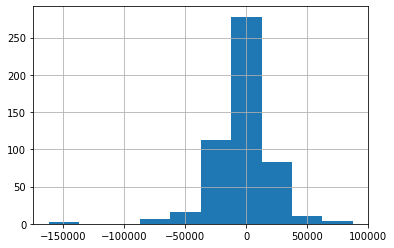

In [27]:
residuals_v2.hist();
# There is still a -150,000. I am going to try to fix that one and that may be my final model.

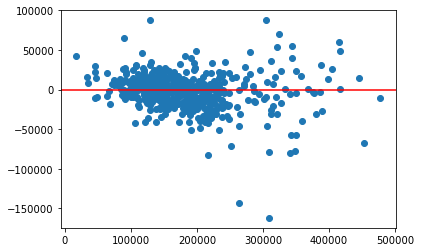

In [28]:
plt.scatter(preds_v2, residuals_v2)
plt.axhline(0, color='r');

The scatter plot shows that the residuals are a little more spread out than before, so not sure if the model is actually better and I just got lucky on the test on Kaggle. It kind of makes sense since the cross val did go down slightly.

In [29]:
pd.DataFrame(residuals_v2).sort_values('SalePrice')
# I noticed it did take down the higher residuals, so my fixes did work on them some.
# However, 348 and 412 are still the main culprits.

,SalePrice
348,-161955.884234
412,-143293.955226
9,-82036.031151
761,-80112.262460
1611,-79121.011572
...,...
1157,59850.835526
170,65578.225562
1770,70691.318964
1757,87460.881845


In [30]:
with pd.option_context('display.max_columns', 200):
    display(df_train_v6.loc[[346,347,348,412],:])
# Basement unfinished might not be being as effective due to the basment sqft times quality and condition.
# Dropping bsmt_sf_qual_cond
# Maybe get rid of Masonry Vaneer Type because it is a big upper and masonry is in multiple places

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,Year Built Year Remod/Add,bed_full_bath,overall_qual_cond,exter_qual_cond,bsmt_qual_cond,mas_vnr_ext_qual_cond,bsmt_sf_qual_cond,garage_area_qual_cond,bsmt_exposure_qual,tot_fire_qu,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
346,2724,905200490,80,0.0,10246,1,NA,1,Lvl,AllPub,CulDSac,1,Norm,Norm,SLvl,4,9,1965,2001,CompShg,0.0,3,4,3,4,3,6,648.0,1,0.0,0.0,648.0,GasA,5,1,SBrkr,960,0,0,960,1.0,1.0,0,0,0,1,3,3,7,0,0,1965.0,1.0,364.0,3,3,1.0,88,0,0,0,0,0,0,NA,NA,0,5,2006,145000,3931965,0,36,12,12,0.0,7776.0,3276.0,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
347,2352,527356060,60,85.0,11475,1,NA,0,Lvl,AllPub,Inside,1,RRAn,Norm,2Story,6,6,1975,1975,CompShg,0.0,3,3,4,3,1,5,550.0,1,0.0,163.0,713.0,GasA,3,1,SBrkr,811,741,0,1552,1.0,0.0,2,1,3,1,3,6,7,1,3,1975.0,2.0,434.0,3,3,1.0,209,208,0,0,0,0,0,MnPrv,NA,0,2,2006,179900,3900625,6,36,9,12,0.0,8556.0,3906.0,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
348,1783,528431110,20,75.0,9986,1,NA,0,Lvl,AllPub,Inside,1,Norm,Norm,1Story,8,5,2006,2007,CompShg,428.0,4,3,5,3,3,1,0.0,1,0.0,1795.0,1795.0,GasA,5,1,SBrkr,1795,0,0,1795,0.0,0.0,2,0,2,1,4,7,

In [31]:
final_feats_v3 = final_feats.drop(columns=['bsmt_sf_qual_cond', 'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace',
                                          'Mas Vnr Type_None', 'Mas Vnr Type_Stone'])

In [32]:
X = df_train_v6[final_feats_v3.columns]
y = df_train_v6['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2010)

linreg.fit(X_train, y_train)

LinearRegression()

In [33]:
linreg.score(X_train, y_train)

0.9289461331353641

In [34]:
linreg.score(X_test, y_test)

0.8911101581793492

In [35]:
cross_val_score(linreg, X_train, y_train).mean()

0.905205804316501

These scores are worse. I am going to submit one last time to Kaggle just for fun, but I think the first version in this notebook is the best model I have.

In [36]:
df_train_v6[final_feats_v3.columns].to_csv('../datasets/ready_for_model/final_feat_v3.csv', index=False)

# Next Steps

Unfortunately my score did not improve on the final submission, but that was to be expected. I am now transitioning over to the last notebook, 04_Final_Submission to put the final version of everything into one place and to summarize my final thoughts and address my problem statement and my recommendations.